In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('test.csv')

# Stacked bar chart with bar labels
### requires matplotlib v3.4.1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [4]:
df_m = df.query("gender == 'm'")
df_f = df.query("gender == 'f'")

In [5]:
males = df_m.department.value_counts().sort_index()
females = df_f.department.value_counts().sort_index()

In [6]:
males

Analytics            2096
Finance               820
HR                    632
Legal                 398
Operations           2792
Procurement          1661
R&D                   415
Sales & Marketing    5942
Technology           1840
Name: department, dtype: int64

In [7]:
females

Analytics             223
Finance               271
HR                    453
Legal                  47
Operations           1972
Procurement          1359
R&D                    25
Sales & Marketing    1373
Technology           1171
Name: department, dtype: int64

In [8]:
males.index == females.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
labels = [x for x in males.index]

In [10]:
labels

['Analytics',
 'Finance',
 'HR',
 'Legal',
 'Operations',
 'Procurement',
 'R&D',
 'Sales & Marketing',
 'Technology']

In [11]:
male_counts = [x for x in males.values]

In [12]:
male_counts

[2096, 820, 632, 398, 2792, 1661, 415, 5942, 1840]

In [13]:
female_counts = [x for x in females.values]

In [14]:
female_counts

[223, 271, 453, 47, 1972, 1359, 25, 1373, 1171]

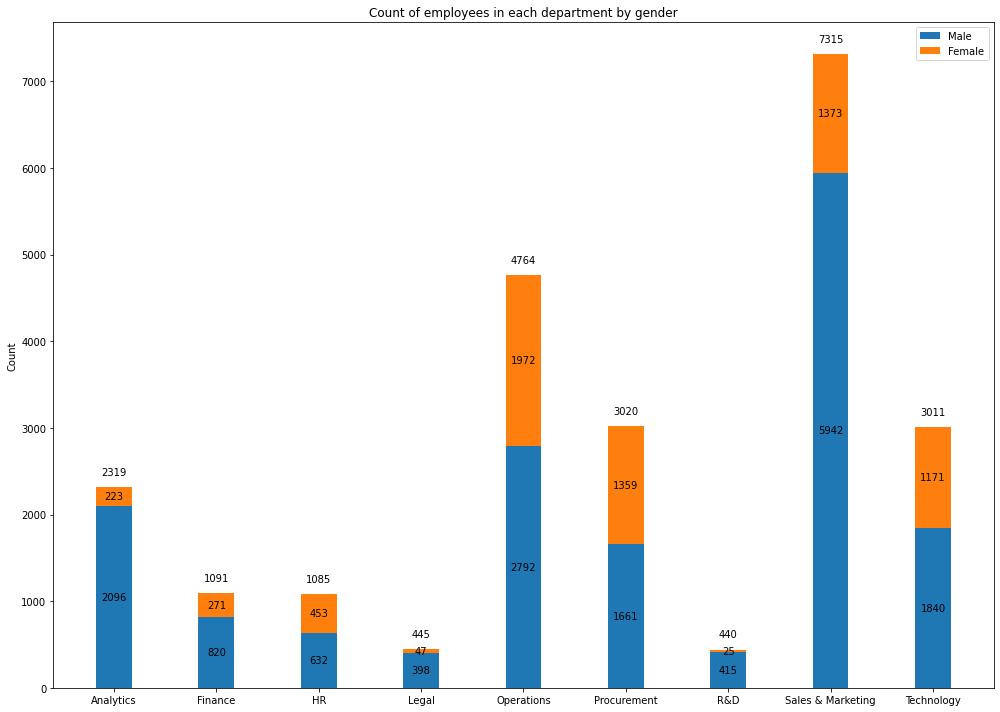

In [15]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=[14,10])
p1 = ax.bar(labels, male_counts, width, label='Male')
p2 = ax.bar(labels, female_counts, width, bottom=male_counts, label='Female')
ax.set_ylabel('Count')
ax.set_title('Count of employees in each department by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(p1, male_counts, label_type='center')
ax.bar_label(p2, female_counts,label_type='center')
ax.bar_label(p2, label_type='edge', padding=10)
fig.tight_layout()
ax.legend()